In [83]:
##Import Statement

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [84]:
#Parameters

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
EPOCHS = 200
TEST_SIZE = 0.2

In [85]:
data_df = pd.read_csv("/home/pgdai/Desktop/March24-DAI-Workspace/DNN-May24/input/machine_learning/wine.csv", header=None)

In [86]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [87]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [88]:
data_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [89]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [90]:
for col in data_df.columns:
    print(f"Col:{col} | {data_df[col].unique()}")

Col:0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Col:1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7 

In [91]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


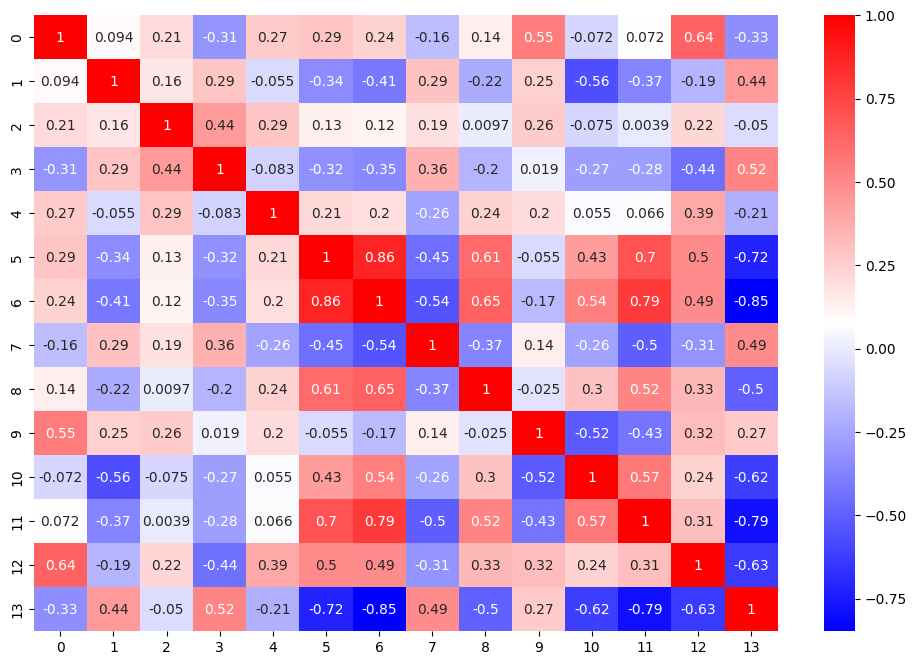

In [92]:

plt.figure(figsize=(12,8))
sns.heatmap(data_df.corr(), annot=True, cmap='bwr');

In [93]:
le = LabelEncoder()
labels = le.fit_transform(data_df[data_df.columns[-1]])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [94]:
features_df = data_df.drop(data_df.columns[-1], axis=1)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [95]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels,
                                                     test_size=TEST_SIZE,
                                                      stratify=labels, 
                                                      random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [96]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# y_train = y_train.to_numpy() #Converting series object to Numpy array
# y_test = y_test.to_numpy()

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [97]:
no_dense_layer = (features_df.shape[1]-3)/2+3
no_dense_layer

8.0

In [98]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=8,
                                activation='relu',
                                kernel_regularizer=None))
model.add(tf.keras.layers.Dense(units=3))

In [99]:
# tf.keras.layers.Dense?

In [100]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])

In [101]:
hist = model.fit(
    x=X_train,
    y=y_train,
    # batch_size=None,
    epochs=EPOCHS,
    verbose='auto',
    # callbacks=None,
    # validation_split=0.0,
    validation_data=[X_test, y_test],
    # shuffle=True,
    # steps_per_epoch=None,
    # validation_steps=None,
    # validation_batch_size=None,
    # validation_freq=1,
    # max_queue_size=10,
    # workers=1,
    # use_multiprocessing=False,
)

Epoch 1/200
5/5 [==============================] - 1s 41ms/step - loss: 1.0992 - accuracy: 0.4014 - val_loss: 0.9154 - val_accuracy: 0.5556
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 1.0608 - accuracy: 0.4296 - val_loss: 0.8845 - val_accuracy: 0.5556
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 1.0256 - accuracy: 0.4507 - val_loss: 0.8559 - val_accuracy: 0.5556
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 0.9924 - accuracy: 0.4718 - val_loss: 0.8288 - val_accuracy: 0.5833
Epoch 5/200
5/5 [==============================] - 0s 12ms/step - loss: 0.9587 - accuracy: 0.5070 - val_loss: 0.8032 - val_accuracy: 0.6111
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 0.9283 - accuracy: 0.5141 - val_loss: 0.7775 - val_accuracy: 0.6667
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 0.8974 - accuracy: 0.5493 - val_loss: 0.7534 - val_accuracy: 0.6944
Epoch 8/200
5/5 [===

In [102]:
loss_df = pd.DataFrame(hist.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.099170,0.401408,0.915362,0.555556
1,1.060754,0.429577,0.884548,0.555556
2,1.025610,0.450704,0.855908,0.555556
3,0.992400,0.471831,0.828812,0.583333
4,0.958738,0.507042,0.803233,0.611111


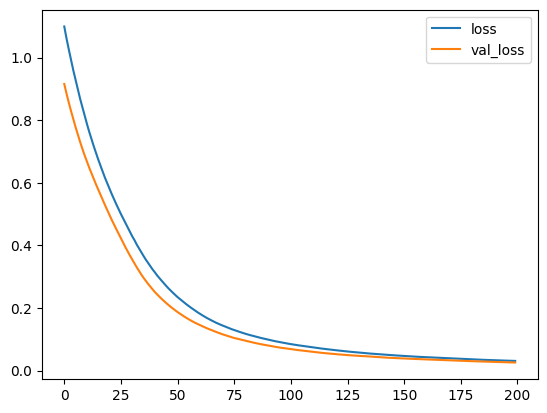

In [104]:
loss_df.plot(y = ['loss','val_loss']);

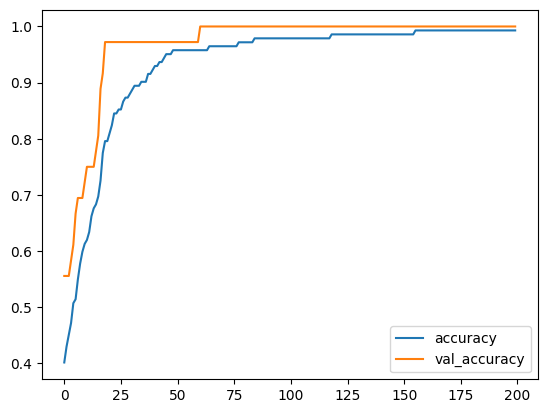

In [105]:
loss_df.plot(y = ['accuracy','val_accuracy']);

In [108]:
# y_pred = model(X_test) don't do this - it will give you an tensor object
y_pred = model.predict(X_test)
y_pred.shape

2/2 [==============================] - 0s 5ms/step


(36, 3)

In [109]:
# y_test and y_pred ka accuracy_score directly nikale toh it will throw error because of different shapes y_test is 1 columns while y_pred is 3 columns
# So

y_pred.argmax(axis=1)


array([1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2])

In [112]:
accuracy_score(y_test, y_pred.argmax(axis=1))

1.0

In [113]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [114]:
confusion_matrix(y_test, y_pred.argmax(axis=1))

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

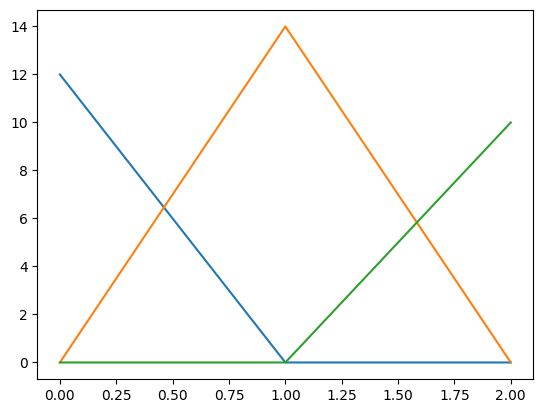

In [117]:
plt.plot(confusion_matrix(y_test, y_pred.argmax(axis=1))); #don't do this

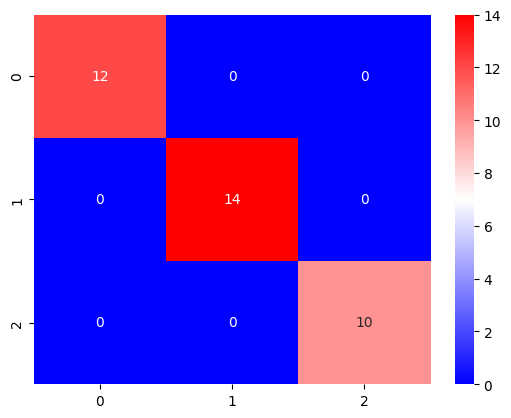

In [120]:
sns.heatmap(confusion_matrix(y_test, y_pred.argmax(axis=1)), annot = True, cmap='bwr');